<a href="https://colab.research.google.com/github/GayathriGalli/umbc_data690_fall2024/blob/main/Assignment/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10/16/2024

In [ ]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", None)

df = pd.read_csv("https://raw.githubusercontent.com/wcj365/python-stats-dataviz/refs/heads/master/fall2024/data/World_Development_Indicators_(WDI).csv")

print(df.shape)
df.sample(3)

(4123, 9)


,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
2748,2016,Nigeria,2144.780344,52.043,188666931.0,NGA,Sub-Saharan Africa,Lower middle income,Blend
3787,2010,Turkmenistan,4286.880505,68.293,5267970.0,TKM,Europe & Central Asia,Upper middle income,IBRD
3676,2013,Timor-Leste,1201.602507,66.440,1161555.0,TLS,East Asia & Pacific,Lower middle income,Blend


In [ ]:
column_names_dict = {
    "GDP per capita (current US$)" : "GDP per Capita",
    "Life expectancy at birth, total (years)" : "Life Expectancy",
    "Population, total" : "Population"
}

df = df.rename(columns=column_names_dict)
df.sample(3)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type
1618,2007,Honduras,1559.886044,70.376,7924462.0,HND,Latin America & Caribbean,Lower middle income,IDA
1793,2011,Isle of Man,77838.396926,79.190,84350.0,IMN,Europe & Central Asia,High income,Not classified
3380,2021,South Africa,7073.612754,62.341,59392255.0,ZAF,Sub-Saharan Africa,Upper middle income,IBRD


In [ ]:
df.sample(3).T

,2773,275,3052
Year,2022,2013,2016
Country,North Macedonia,Bahrain,Romania
GDP per Capita,6591.471314,25790.730312,9404.381259
Life Expectancy,NaN,79.246,75.209756
Population,2057679.0,1261673.0,19702267.0
Country Code,MKD,BHR,ROU
Region,Europe & Central Asia,Middle East & North Africa,Europe & Central Asia
Income Group,Upper middle income,High income,High income
Lending Type,IBRD,Not classified,IBRD


## Section One

Summary Statistics with describe() function

In [ ]:
df[["Population","Life Expectancy"]].describe()

,Population,Life Expectancy
count,4.123000e+03,3777.000000
mean,3.319575e+07,71.060853
std,1.316430e+08,8.499806
min,9.791000e+03,42.125000
25%,7.436200e+05,65.351000
50%,5.872624e+06,72.765000
75%,2.148494e+07,77.529000
max,1.417173e+09,85.497561


In [ ]:
df.describe()

,Year,GDP per Capita,Life Expectancy,Population
count,4123.00000,3962.000000,3777.000000,4.123000e+03
mean,2013.00000,17007.692848,71.060853,3.319575e+07
std,5.47789,25733.109164,8.499806,1.316430e+08
min,2004.00000,128.538423,42.125000,9.791000e+03
25%,2008.00000,1862.892400,65.351000,7.436200e+05
50%,2013.00000,6048.304202,72.765000,5.872624e+06
75%,2018.00000,22137.309568,77.529000,2.148494e+07
max,2022.00000,240862.182448,85.497561,1.417173e+09


In [ ]:
df.describe(include="object")

,Country,Country Code,Region,Income Group,Lending Type
count,4123,4123,4123,4123,4123
unique,217,217,7,5,4
top,Afghanistan,AFG,Europe & Central Asia,High income,Not classified
freq,19,19,1102,1558,1387


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Country,4123,217,Afghanistan,19
Country Code,4123,217,AFG,19
Region,4123,7,Europe & Central Asia,1102
Income Group,4123,5,High income,1558
Lending Type,4123,4,Not classified,1387


## Section Two

Compute quartiles and transform a numerical column into a categorical column based on the quartiles.

In [ ]:
def assign_quartile(gdp):
    if gdp <= 1862.89:
        quartile = "1st Quartile (<=25%)"
    elif gdp > 1862.89 and gdp <= 6048.30:
        quartile = "2nd Quartile (25-50%)"
    elif gdp > 6048.30 and gdp <= 22137.31:
        quartile = "3rd Quartile (50-75%)"
    else:
        quartile = "4th Quartile (>75%)"
    return quartile


hungary = assign_quartile(14294.25)
hungary

'3rd Quartile (50-75%)'

In [ ]:
df_usa = df[df["Country Code"] == "USA"]
df_usa

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type
3914,2004,United States,41724.631629,77.487805,292805298.0,USA,North America,High income,Not classified
3915,2005,United States,44123.407068,77.487805,295516599.0,USA,North America,High income,Not classified
3916,2006,United States,46302.000880,77.687805,298379912.0,USA,North America,High income,Not classified
3917,2007,United States,48050.223777,77.987805,301231207.0,USA,North America,High income,Not classified
3918,2008,United States,48570.045980,78.039024,304093966.0,USA,North America,High income,Not classified
3919,2009,United States,47194.943355,78.390244,306771529.0,USA,North America,High income,Not classified
3920,2010,United States,48650.643128,78.541463,309327143.0,USA,North America,High income,Not classified
3921,2011,United States,50065.966504,78.641463,311583481.0,USA,North America,High income,Not classified
3922,2012,United States,51784.418574,78.741463,313877662.0,USA,North America,High income,Not classified
3923,2013,United States,53291.127689,78.741463,316059947.0,USA,North America,High income,Not classified


In [ ]:
assign_quartile(76329.58)

'4th Quartile (>75%)'

In [ ]:
df_2020 = df[df["Year"] == 2020]
print(df_2020.shape[0])
print(f"There are {df_2020.shape[0]} countries in the 2020 dataset")
df_2020.sample(3)

217
There are 217 countries in the 2020 dataset


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type
2790,2020,Northern Mariana Islands,17302.922137,NaN,49587.0,MNP,East Asia & Pacific,High income,Not classified
2657,2020,Netherlands,52162.570115,81.358537,17441500.0,NLD,Europe & Central Asia,High income,Not classified
4044,2020,Virgin Islands (U.S.),39411.045254,79.819512,106290.0,VIR,Latin America & Caribbean,High income,Not classified


In [ ]:
# Tuple
df_2020.shape

(217, 9)

## In-class Exercise

Create a new column call "GDP Quartile" in the df_2020 dataframe and assign each country the quartile it belongs to by applying the assign_quartile() function.


In [ ]:
df_2020["GDP Quartile"] = df_2020["GDP per Capita"].apply(assign_quartile)

print(df_2020.shape[0])
print(df_2020["GDP Quartile"].value_counts())

217
GDP Quartile
4th Quartile (>75%)      61
2nd Quartile (25-50%)    58
3rd Quartile (50-75%)    54
1st Quartile (<=25%)     44
Name: count, dtype: int64


In [ ]:
df_2020.sample(10)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile
3132,2020,San Marino,45321.489223,NaN,34007.0,SMR,Europe & Central Asia,High income,Not classified,4th Quartile (>75%)
1061,2020,Dominica,7003.469891,73.649,71995.0,DMA,Latin America & Caribbean,Upper middle income,Blend,3rd Quartile (50-75%)
3645,2020,Tanzania,1104.164429,66.408,61704518.0,TZA,Sub-Saharan Africa,Lower middle income,IDA,1st Quartile (<=25%)
2011,2020,Kosovo,4310.934002,76.567,1790133.0,XKX,Europe & Central Asia,Upper middle income,IDA,2nd Quartile (25-50%)
1802,2020,Isle of Man,79530.605484,80.588,84046.0,IMN,Europe & Central Asia,High income,Not classified,4th Quartile (>75%)
434,2020,Bhutan,3181.339747,71.609,772506.0,BTN,South Asia,Lower middle income,IDA,2nd Quartile (25-50%)
1897,2020,Jordan,3998.673138,75.184,10928721.0,JOR,Middle East & North Africa,Lower middle income,IBRD,2nd Quartile (25-50%)
1042,2020,Djibouti,2921.738706,62.694,1090156.0,DJI,Middle East & North Africa,Lower middle income,IDA,2nd Quartile (25-50%)
3493,2020,St. Martin (French part),NaN,80.149,32553.0,MAF,Latin America & Caribbean,High income,Not classified,4th Quartile (>75%)
3816,2020,Turks and Caicos Islands,20882.261270,75.001,44276.0,TCA,Latin America & Caribbean,High income,Not classified,3rd Quartile (50-75%)


In [ ]:
df_4th = df_2020[df_2020["GDP Quartile"] == "4th Quartile (>75%)"]
df_4th.shape

(61, 10)

In [ ]:
", ".join(list(df_4th["Country"]))

"Andorra, Aruba, Australia, Austria, Bahamas, The, Bahrain, Belgium, Bermuda, British Virgin Islands, Brunei Darussalam, Canada, Cayman Islands, Channel Islands, Cyprus, Czechia, Denmark, Eritrea, Estonia, Faroe Islands, Finland, France, Germany, Gibraltar, Greenland, Guam, Hong Kong SAR, China, Iceland, Ireland, Isle of Man, Israel, Italy, Japan, Korea, Dem. People's Rep., Korea, Rep., Kuwait, Liechtenstein, Luxembourg, Macao SAR, China, Malta, Monaco, Netherlands, New Caledonia, New Zealand, Norway, Portugal, Puerto Rico, Qatar, San Marino, Singapore, Sint Maarten (Dutch part), Slovenia, South Sudan, Spain, St. Martin (French part), Sweden, Switzerland, United Arab Emirates, United Kingdom, United States, Venezuela, RB, Virgin Islands (U.S.)"

In [ ]:


quartile_groups = df_2020.groupby("GDP Quartile")["Country"].apply(list)


for quartile, countries in quartile_groups.items():
  print(f"{quartile}:")
  for country in countries:
      print(f"  - {country}")
  print("\n")

1st Quartile (<=25%):
  - Afghanistan
  - Angola
  - Benin
  - Burkina Faso
  - Burundi
  - Cambodia
  - Cameroon
  - Central African Republic
  - Chad
  - Comoros
  - Congo, Dem. Rep.
  - Ethiopia
  - Gambia, The
  - Guinea
  - Guinea-Bissau
  - Haiti
  - Kiribati
  - Kyrgyz Republic
  - Lesotho
  - Liberia
  - Madagascar
  - Malawi
  - Mali
  - Mauritania
  - Mozambique
  - Myanmar
  - Nepal
  - Niger
  - Pakistan
  - Rwanda
  - Senegal
  - Sierra Leone
  - Somalia
  - Sudan
  - Syrian Arab Republic
  - Tajikistan
  - Tanzania
  - Timor-Leste
  - Togo
  - Uganda
  - Uzbekistan
  - Yemen, Rep.
  - Zambia
  - Zimbabwe


2nd Quartile (25-50%):
  - Albania
  - Algeria
  - Armenia
  - Azerbaijan
  - Bangladesh
  - Belize
  - Bhutan
  - Bolivia
  - Botswana
  - Cabo Verde
  - Colombia
  - Congo, Rep.
  - Cote d'Ivoire
  - Djibouti
  - Ecuador
  - Egypt, Arab Rep.
  - El Salvador
  - Eswatini
  - Fiji
  - Georgia
  - Ghana
  - Guatemala
  - Honduras
  - India
  - Indonesia
  - Iran, Islamic

In [ ]:
for quartile, countries in quartile_groups.items():
  print(f"{quartile}:")
  for country in countries:
      print(f"  - {country}")
  print("\n")

1st Quartile (<=25%):
  - Afghanistan
  - Angola
  - Benin
  - Burkina Faso
  - Burundi
  - Cambodia
  - Cameroon
  - Central African Republic
  - Chad
  - Comoros
  - Congo, Dem. Rep.
  - Ethiopia
  - Gambia, The
  - Guinea
  - Guinea-Bissau
  - Haiti
  - Kiribati
  - Kyrgyz Republic
  - Lesotho
  - Liberia
  - Madagascar
  - Malawi
  - Mali
  - Mauritania
  - Mozambique
  - Myanmar
  - Nepal
  - Niger
  - Pakistan
  - Rwanda
  - Senegal
  - Sierra Leone
  - Somalia
  - Sudan
  - Syrian Arab Republic
  - Tajikistan
  - Tanzania
  - Timor-Leste
  - Togo
  - Uganda
  - Uzbekistan
  - Yemen, Rep.
  - Zambia
  - Zimbabwe


2nd Quartile (25-50%):
  - Albania
  - Algeria
  - Armenia
  - Azerbaijan
  - Bangladesh
  - Belize
  - Bhutan
  - Bolivia
  - Botswana
  - Cabo Verde
  - Colombia
  - Congo, Rep.
  - Cote d'Ivoire
  - Djibouti
  - Ecuador
  - Egypt, Arab Rep.
  - El Salvador
  - Eswatini
  - Fiji
  - Georgia
  - Ghana
  - Guatemala
  - Honduras
  - India
  - Indonesia
  - Iran, Islamic

In [ ]:
df_2020 = df_2020.dropna()
df_2020["GDP (Rounded)"] = df_2020["GDP per Capita"].apply(round)
df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile,GDP (Rounded)
2448,2020,"Micronesia, Fed. Sts.",3639.412699,70.674000,112106.0,FSM,East Asia & Pacific,Lower middle income,IDA,2nd Quartile (25-50%),3639
1004,2020,Czechia,22992.879383,78.226829,10697858.0,CZE,Europe & Central Asia,High income,Not classified,4th Quartile (>75%),22993
2182,2020,Liechtenstein,165287.186767,81.658537,38756.0,LIE,Europe & Central Asia,High income,Not classified,4th Quartile (>75%),165287
1099,2020,Ecuador,5645.199290,72.153000,17588595.0,ECU,Latin America & Caribbean,Upper middle income,IBRD,2nd Quartile (25-50%),5645
472,2020,Bosnia and Herzegovina,6095.104237,76.225000,3318407.0,BIH,Europe & Central Asia,Upper middle income,IBRD,3rd Quartile (50-75%),6095


In [ ]:
def pop_million(pop):
    return pop / 1000000


df_2020["Population (Million)"] = df_2020["Population"].apply(pop_million)

df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile,GDP (Rounded),Population (Million)
1004,2020,Czechia,22992.879383,78.226829,10697858.0,CZE,Europe & Central Asia,High income,Not classified,4th Quartile (>75%),22993,10.697858
130,2020,Antigua and Barbuda,15224.858589,78.841000,92664.0,ATG,Latin America & Caribbean,High income,IBRD,3rd Quartile (50-75%),15225,0.092664
2581,2020,Myanmar,1479.613689,66.797000,53423198.0,MMR,East Asia & Pacific,Lower middle income,IDA,1st Quartile (<=25%),1480,53.423198
4025,2020,Viet Nam,3586.347176,75.378000,96648685.0,VNM,East Asia & Pacific,Lower middle income,IBRD,2nd Quartile (25-50%),3586,96.648685
2714,2020,Nicaragua,1876.607378,71.795000,6755895.0,NIC,Latin America & Caribbean,Lower middle income,IDA,2nd Quartile (25-50%),1877,6.755895


In [ ]:
df_2020["Population2 (Million)"] = df_2020["Population"].apply(lambda pop : pop / 1000000)
df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile,GDP (Rounded),Population (Million),Population2 (Million)
1802,2020,Isle of Man,79530.605484,80.588000,84046.0,IMN,Europe & Central Asia,High income,Not classified,4th Quartile (>75%),79531,0.084046,0.084046
225,2020,Austria,48789.497850,81.192683,8916864.0,AUT,Europe & Central Asia,High income,Not classified,4th Quartile (>75%),48789,8.916864,8.916864
1593,2020,Guyana,6863.074346,68.486000,797202.0,GUY,Latin America & Caribbean,High income,IDA,3rd Quartile (50-75%),6863,0.797202,0.797202
3151,2020,Sao Tome and Principe,2155.265868,67.785000,218641.0,STP,Sub-Saharan Africa,Lower middle income,IDA,2nd Quartile (25-50%),2155,0.218641,0.218641
662,2020,Cameroon,1539.130545,60.833000,26491087.0,CMR,Sub-Saharan Africa,Lower middle income,Blend,1st Quartile (<=25%),1539,26.491087,26.491087


## Homework Question 1

Save the summary statistics of all numerical columns and all categorical columns to only one Excel spreadsheet file with two worksheets, one for numerical and one for categorical columns.

In [ ]:

# Makes an Excel workbook with sheets, 'Numerical' and 'Categorical', and they
# contain numerical and categorical summary statistics, respectively.
with pd.ExcelWriter('summary_stats.xlsx') as writer:
    df.describe().to_excel(writer, sheet_name='Numerical')
    df.describe(include='object').to_excel(writer, sheet_name='Categorical')

## Homework Question 2

Create a new column that is the GDP per Capita rounded to 2 decimal points by using the Python's build function "round"
Hint: apply the round function/method and provide a parameter 2.

In [ ]:
x = 12.23456

y = round(x, 2)
y

12.23

In [ ]:
# Replaces the 'GDP per Capita' column with a new column with the GDP values
# rounded to (2) decimal places.
df['GDP per Capita 2'] = df['GDP per Capita'].apply(lambda gdp: round(gdp, 2))
df.sample(5)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2
495,2005,Brazil,4773.268551,71.753000,186797334.0,BRA,Latin America & Caribbean,Upper middle income,IBRD,4773.27
189,2022,Aruba,33300.838819,NaN,106445.0,ABW,Latin America & Caribbean,High income,Not classified,33300.84
897,2008,Cote d'Ivoire,1683.337505,53.653000,20244449.0,CIV,Sub-Saharan Africa,Lower middle income,IDA,1683.34
2603,2004,Nauru,NaN,58.072000,10335.0,NRU,East Asia & Pacific,High income,IBRD,NaN
2167,2005,Liechtenstein,105751.498913,80.668293,34603.0,LIE,Europe & Central Asia,High income,Not classified,105751.50


In [ ]:
def round_gdp(gdp, dec):
    return round(gdp, dec)


df['GDP per Capita 3'] = df['GDP per Capita'].apply(round_gdp, args=(5,))
df.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3
2286,2010,Malaysia,8880.145805,74.442,28717731.0,MYS,East Asia & Pacific,Upper middle income,IBRD,8880.15,8880.14580
2749,2017,Nigeria,1941.879479,52.305,193495907.0,NGA,Sub-Saharan Africa,Lower middle income,Blend,1941.88,1941.87948
1495,2017,Grenada,9309.261296,74.765,120921.0,GRD,Latin America & Caribbean,Upper middle income,Blend,9309.26,9309.26130
3730,2010,Trinidad and Tobago,15711.558706,72.725,1410296.0,TTO,Latin America & Caribbean,High income,IBRD,15711.56,15711.55871
3959,2011,Uzbekistan,2051.129515,69.649,29339400.0,UZB,Europe & Central Asia,Lower middle income,Blend,2051.13,2051.12952


## Homework Question 3 (bonus, will cover next week)

step 1 - create a column "Life Expectancy Quartile" similar to the GDP per Capita Quartile above.
Step 2 - Create a column "health and wealth status" based on the following definition
- rich and healthy (1st GDP per capita quartile and 1st life expentancy quartile)
- poor and unhealthy ((4th GDP per capita quartile and 4th life expentancy quartile)
- rich and unhealthy (1st GDP per capita quartile and 4th life expentancy quartile)
- poor and healthy ((4th GDP per capita quartile and 1st life expentancy quartile)
- Other

In [ ]:
print(df.shape)
df.sample(5)


(4123, 11)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3
2370,2018,Marshall Islands,4771.359204,64.500,45989.0,MHL,East Asia & Pacific,Upper middle income,IDA,4771.36,4771.35920
1210,2017,Eswatini,3824.046783,57.895,1151390.0,SWZ,Sub-Saharan Africa,Lower middle income,IBRD,3824.05,3824.04678
516,2007,British Virgin Islands,NaN,75.039,25191.0,VGB,Latin America & Caribbean,High income,Not classified,NaN,NaN
3152,2021,Sao Tome and Principe,2350.452701,67.591,223107.0,STP,Sub-Saharan Africa,Lower middle income,IDA,2350.45,2350.45270
942,2015,Cuba,7683.740254,77.772,11339894.0,CUB,Latin America & Caribbean,Upper middle income,Not classified,7683.74,7683.74025


In [ ]:
df_2020 = df[df["Year"] == 2020]
print(df_2020.shape)
df_2020.sample(5)

(217, 11)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3
567,2020,Bulgaria,10148.342395,73.658537,6934015.0,BGR,Europe & Central Asia,Upper middle income,IBRD,10148.34,10148.34240
1745,2020,"Iran, Islamic Rep.",2746.419483,74.832000,87290193.0,IRN,Middle East & North Africa,Lower middle income,IBRD,2746.42,2746.41948
2163,2020,Libya,7034.658364,72.472000,6653942.0,LBY,Middle East & North Africa,Upper middle income,IBRD,7034.66,7034.65836
3322,2020,Slovenia,25558.429054,80.531707,2102419.0,SVN,Europe & Central Asia,High income,Not classified,25558.43,25558.42905
3398,2020,South Sudan,NaN,55.480000,10606227.0,SSD,Sub-Saharan Africa,Low income,IDA,NaN,NaN


In [ ]:
df_2020 = df_2020.dropna(subset=["GDP per Capita", "Life Expectancy"])
df_2020.shape

(202, 11)

In [ ]:
# Step 1: Creates 'Life Expectancy Quartile' column and lists the quartile the row falls under.
df_2020['Life Expectancy'].describe()



,Life Expectancy
count,202.000000
mean,72.314599
std,7.451962
min,52.777000
25%,66.779750
50%,72.871500
75%,77.981750
max,85.497561


In [ ]:
x = df_2020['Life Expectancy'].describe()['25%']
y = df_2020['Life Expectancy'].describe()['50%']
z = df_2020['Life Expectancy'].describe()['75%']

In [ ]:
def assign_quartile_life(life_exp, x, y, z):
    if life_exp <= x:
        quartile = "1st Quartile (<=25%)"
    elif life_exp > x and life_exp <= y:
        quartile = "2nd Quartile (25-50%)"
    elif life_exp > y and life_exp <= z:
        quartile = "3rd Quartile (50-75%)"
    else:
        quartile = "4th Quartile (>75%)"
    return quartile

df_2020['Life Expectancy Quartile'] = df_2020['Life Expectancy'].apply(assign_quartile_life, args=(x, y, z,))
df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile
2125,2020,Lesotho,917.356381,54.69300,2254100.0,LSO,Sub-Saharan Africa,Lower middle income,IDA,917.36,917.35638,1st Quartile (<=25%)
1099,2020,Ecuador,5645.199290,72.15300,17588595.0,ECU,Latin America & Caribbean,Upper middle income,IBRD,5645.20,5645.19929,2nd Quartile (25-50%)
662,2020,Cameroon,1539.130545,60.83300,26491087.0,CMR,Sub-Saharan Africa,Lower middle income,Blend,1539.13,1539.13055,1st Quartile (<=25%)
2961,2020,Philippines,3224.422811,72.11900,112190977.0,PHL,East Asia & Pacific,Lower middle income,IBRD,3224.42,3224.42281,2nd Quartile (25-50%)
3911,2020,United Kingdom,40217.009012,80.35122,67081234.0,GBR,Europe & Central Asia,High income,Not classified,40217.01,40217.00901,4th Quartile (>75%)


In [ ]:
x = df_2020['GDP per Capita'].describe()['25%']
y = df_2020['GDP per Capita'].describe()['50%']
z = df_2020['GDP per Capita'].describe()['75%']

print(x, y, z)

2188.047693164725 5920.260418960404 20761.21119943435


In [ ]:
# Step 2: Creates 'GDP Quartile' column and lists the quartile the row falls under.
# Next, creates 'Health and Wealth Status' column which categorizes a row if
# a country and a year falls under (4) different categories.

def assign_quartile(gdp, x, y, z):
  if gdp < x:
    quartile = '1st Quartile (<=25%)'
  elif gdp > x and gdp <= y:
    quartile = '2nd Quartile (25-50%)'
  elif gdp > y and gdp <= z:
    quartile = '3rd Quartile (50-75%)'
  else:
    quartile = '4th Quartile (>75%)'
  return quartile

df_2020['GDP Quartile'] =  df_2020['GDP per Capita'].apply(assign_quartile, args=(x, y, z,))
df_2020.sample(10)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile
3265,2020,Singapore,61273.991659,84.465854,5685807.0,SGP,East Asia & Pacific,High income,Not classified,61273.99,61273.99166,4th Quartile (>75%),4th Quartile (>75%)
168,2020,Armenia,4505.867742,72.173000,2805608.0,ARM,Europe & Central Asia,Upper middle income,IBRD,4505.87,4505.86774,2nd Quartile (25-50%),2nd Quartile (25-50%)
2467,2020,Moldova,4376.242493,70.166000,2635130.0,MDA,Europe & Central Asia,Upper middle income,IBRD,4376.24,4376.24249,2nd Quartile (25-50%),2nd Quartile (25-50%)
2752,2020,Nigeria,2074.613747,52.887000,208327405.0,NGA,Sub-Saharan Africa,Lower middle income,Blend,2074.61,2074.61375,1st Quartile (<=25%),1st Quartile (<=25%)
2581,2020,Myanmar,1479.613689,66.797000,53423198.0,MMR,East Asia & Pacific,Lower middle income,IDA,1479.61,1479.61369,2nd Quartile (25-50%),1st Quartile (<=25%)
2315,2020,Maldives,7216.816371,79.875000,514438.0,MDV,South Asia,Upper middle income,IDA,7216.82,7216.81637,4th Quartile (>75%),3rd Quartile (50-75%)
320,2020,Barbados,16882.501523,77.393000,280693.0,BRB,Latin America & Caribbean,High income,Not classified,16882.50,16882.50152,3rd Quartile (50-75%),3rd Quartile (50-75%)
3531,2020,Sudan,608.332520,65.614000,44440486.0,SDN,Sub-Saharan Africa,Low income,IDA,608.33,608.33252,1st Quartile (<=25%),1st Quartile (<=25%)
757,2020,Channel Islands,57339.526871,81.264000,171113.0,CHI,Europe & Central Asia,High income,Not classified,57339.53,57339.52687,4th Quartile (>75%),4th Quartile (>75%)
2258,2020,Madagascar,462.404229,65.182000,28225177.0,MDG,Sub-Saharan Africa,Low income,IDA,462.40,462.40423,1st Quartile (<=25%),1st Quartile (<=25%)


In [ ]:
def find_status(row):
  if (row['Life Expectancy Quartile'] == "1st Quartile (<=25%)") and (row['GDP Quartile'] == "1st Quartile (<=25%)"):
    return 'Poor and unhealthy'
  elif (row['Life Expectancy Quartile'] == "4th Quartile (>75%)") and (row['GDP Quartile'] == "1st Quartile (<=25%)"):
    return 'Poor but healthy'
  elif (row['Life Expectancy Quartile'] == "4th Quartile (>75%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich and healthy'
  elif (row['Life Expectancy Quartile'] == "3rd Quartile (50-75%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich and somewhat healthy'
  elif (row['Life Expectancy Quartile'] == "2nd Quartile (25-50%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich and somewhat unhealthy'
  elif (row['Life Expectancy Quartile'] == "1st Quartile (<=25%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich but unhealthy'
  else:
    return 'Other'

df_2020['Health and Wealth Status'] = df_2020.apply(find_status,axis=1)
df_2020.sample(10)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile,Health and Wealth Status
3360,2020,Somalia,556.578066,55.967000,16537016.0,SOM,Sub-Saharan Africa,Low income,IDA,556.58,556.57807,1st Quartile (<=25%),1st Quartile (<=25%),Poor and unhealthy
757,2020,Channel Islands,57339.526871,81.264000,171113.0,CHI,Europe & Central Asia,High income,Not classified,57339.53,57339.52687,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
3265,2020,Singapore,61273.991659,84.465854,5685807.0,SGP,East Asia & Pacific,High income,Not classified,61273.99,61273.99166,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
624,2020,Cabo Verde,3126.399859,74.808000,582640.0,CPV,Sub-Saharan Africa,Lower middle income,Blend,3126.40,3126.39986,3rd Quartile (50-75%),2nd Quartile (25-50%),Other
1099,2020,Ecuador,5645.199290,72.153000,17588595.0,ECU,Latin America & Caribbean,Upper middle income,IBRD,5645.20,5645.19929,2nd Quartile (25-50%),2nd Quartile (25-50%),Other
4044,2020,Virgin Islands (U.S.),39411.045254,79.819512,106290.0,VIR,Latin America & Caribbean,High income,Not classified,39411.05,39411.04525,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
320,2020,Barbados,16882.501523,77.393000,280693.0,BRB,Latin America & Caribbean,High income,Not classified,16882.50,16882.50152,3rd Quartile (50-75%),3rd Quartile (50-75%),Other
2467,2020,Moldova,4376.242493,70.166000,2635130.0,MDA,Europe & Central Asia,Upper middle income,IBRD,4376.24,4376.24249,2nd Quartile (25-50%),2nd Quartile (25-50%),Other
1593,2020,Guyana,6863.074346,68.486000,797202.0,GUY,Latin America & Caribbean,High income,IDA,6863.07,6863.07435,2nd Quartile (25-50%),3rd Quartile (50-75%),Other
3094,2020,Rwanda,773.773261,66.774000,13146362.0,RWA,Sub-Saharan Africa,Low income,IDA,773.77,773.77326,1st Quartile (<=25%),1st Quartile (<=25%),Poor and unhealthy


In [ ]:
df_2020["Health and Wealth Status"].value_counts()

,count
Health and Wealth Status,
Other,113
Rich and healthy,42
Poor and unhealthy,38
Rich and somewhat healthy,7
Rich and somewhat unhealthy,2


# Countries that belong to each status category.

In [ ]:
df_rich_healthy = df_2020[df_2020["Health and Wealth Status"] == "Rich and healthy"]
print(df_rich_healthy.shape)
df_rich_healthy.sample(5)

(42, 14)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile,Health and Wealth Status
4044,2020,Virgin Islands (U.S.),39411.045254,79.819512,106290.0,VIR,Latin America & Caribbean,High income,Not classified,39411.05,39411.04525,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
3322,2020,Slovenia,25558.429054,80.531707,2102419.0,SVN,Europe & Central Asia,High income,Not classified,25558.43,25558.42905,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
757,2020,Channel Islands,57339.526871,81.264000,171113.0,CHI,Europe & Central Asia,High income,Not classified,57339.53,57339.52687,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
3892,2020,United Arab Emirates,37629.174169,78.946000,9287289.0,ARE,Middle East & North Africa,High income,Not classified,37629.17,37629.17417,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
2999,2020,Portugal,22242.406418,80.975610,10297081.0,PRT,Europe & Central Asia,High income,Not classified,22242.41,22242.40642,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy


In [ ]:
df_rich_healthy["Country"].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Bermuda', 'Canada',
       'Channel Islands', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Faroe Islands', 'Finland', 'France', 'Germany',
       'Hong Kong SAR, China', 'Iceland', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Liechtenstein',
       'Luxembourg', 'Macao SAR, China', 'Malta', 'Netherlands',
       'New Caledonia', 'New Zealand', 'Norway', 'Portugal',
       'Puerto Rico', 'Qatar', 'Singapore', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'Virgin Islands (U.S.)'], dtype=object)

In [ ]:
df_poor_unhealthy = df_2020[df_2020["Health and Wealth Status"] == "Poor and unhealthy"]
print(df_poor_unhealthy.shape)
df_poor_unhealthy["Country"].unique()

(38, 14)


array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Ethiopia', 'Gambia, The',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda',
       'Sierra Leone', 'Somalia', 'Sudan', 'Tanzania', 'Togo', 'Uganda',
       'Yemen, Rep.', 'Zambia', 'Zimbabwe'], dtype=object)

In [ ]:
df_poor_healthy = df_2020[df_2020["Health and Wealth Status"] == "Poor but healthy"]
print(df_poor_healthy.shape)
df_poor_healthy["Country"].unique()

(0, 14)


array([], dtype=object)

In [ ]:
df_rich_unhealthy = df_2020[df_2020["Health and Wealth Status"] == "Rich but unhealthy"]
print(df_rich_unhealthy.shape)
df_rich_unhealthy["Country"].unique()

(0, 14)


array([], dtype=object)

In [ ]:
df_rich_unhealthy

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile,Health and Wealth Status


In [ ]:
df_other = df_2020[df_2020["Health and Wealth Status"] == "Other"]
df_other["Country"].nunique()

113

# Choropleth - Chorom (colorful), pleth -map, place.

Plot population of countries over a map using plotly

In [ ]:
# Create the plot
fig = px.choropleth(
    df_2020,
    locations="Country",
    locationmode='country names',
    color="Health and Wealth Status",
    hover_name="Country",
#    color_continuous_scale=px.colors.sequential.Inferno
)

# Show the plot
fig.show()

## Home work Question 1:
Following what we did in class, further break down the category of poor countries and use additional statuses:

- Poor and somewhat healthy
- Poor and somewhat unhealthy

Then make the choropleth plot.

In [ ]:
# Step 1: Define thresholds for categorizing health statuses
threshold_healthy = 60  # Adjust this based on your analysis (for Life Expectancy)
threshold_unhealthy = 40  # Another threshold (this could be for a different measure)

# Step 2: Update the Health and Wealth Status categories
df_2020['Health and Wealth Status'] = df_2020.apply(
    lambda row: "Poor and somewhat healthy" if row["Health and Wealth Status"] == "Poor and somewhat unhealthy" and row["Life Expectancy"] >= threshold_healthy else
                 "Poor and somewhat unhealthy" if row["Health and Wealth Status"] == "Poor and somewhat unhealthy" and row["Life Expectancy"] < threshold_healthy else
                 row["Health and Wealth Status"],
    axis=1
)

# Step 3: Verify the unique values after categorization
print("Updated Categories:", df_2020["Health and Wealth Status"].unique())

# Step 4: Create the choropleth plot with updated categories
import plotly.express as px

fig = px.choropleth(
    df_2020,
    locations="Country",
    locationmode="country names",
    color="Health and Wealth Status",
    hover_name="Country",
    title="Health and Wealth Status by Country",
)

# Show the plot
fig.show()


Updated Categories: ['Poor and somewhat healthy' 'Other' 'Rich and somewhat healthy'
 'Rich and healthy' 'Rich and somewhat unhealthy'
 'Poor and somewhat unhealthy']


# Home work question 2:

Think of ways to avoid/eliminate the possibility of typos that cause the calculation issues. How to make your program more robust and less error-prong.

In [ ]:
import pandas as pd
import logging
from enum import Enum

# Set up logging
logging.basicConfig(level=logging.INFO)

# Define an enumeration for health statuses
class HealthStatus(Enum):
    POOR_SOMEWHAT_HEALTHY = "Poor and somewhat healthy"
    POOR_SOMEWHAT_UNHEALTHY = "Poor and somewhat unhealthy"
    RICH_HEALTHY = "Rich and healthy"
    OTHER = "Other"

# Define an enumeration for country names (all uppercase)
class CountryName(Enum):
    USA = "USA"
    CANADA = "CANADA"
    MEXICO = "MEXICO"
    BRAZIL = "BRAZIL"
    INDIA = "INDIA"

# Predefined lists of valid entries
VALID_COUNTRIES = [country.value for country in CountryName]
VALID_STATUSES = [status.value for status in HealthStatus]

# Function to normalize country names
def normalize_country_names(country):
    country = country.strip().upper()  # Normalize the country name to uppercase
    if country not in VALID_COUNTRIES:
        raise ValueError(f"Invalid country name: {country}")
    return country

# Function to clean and validate data
def clean_data(df):
    try:
        df['Country'] = df['Country'].apply(normalize_country_names)
    except ValueError as e:
        logging.error(e)

    # Filter DataFrame for valid health statuses
    valid_statuses = [status.value for status in HealthStatus]
    df = df[df['Health and Wealth Status'].isin(valid_statuses)]

    # Fill NaN values in 'Life Expectancy' with the mean
    df['Life Expectancy'] = df['Life Expectancy'].fillna(df['Life Expectancy'].mean())

    # Validate life expectancy range
    if any(df['Life Expectancy'] < 0):
        logging.error("Life Expectancy cannot be negative!")

    return df

# Example data
data = {
    "Country": [" Usa ", " CANADA", "MEXICO ", "Brazil", "USA", "India "],
    "Life Expectancy": [80, 82, 77, 75, None, 68],
    "Health and Wealth Status": [
        "Poor and somewhat healthy",
        "Rich and healthy",
        "Poor and somewhat unhealthy",
        "Poor and somewhat healthy",
        "Poor and somewhat unhealthy",
        "Rich and healthy"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Clean the data
cleaned_df = clean_data(df)

# Display the cleaned DataFrame
print(cleaned_df)


  Country  Life Expectancy     Health and Wealth Status
0     USA             80.0    Poor and somewhat healthy
1  CANADA             82.0             Rich and healthy
2  MEXICO             77.0  Poor and somewhat unhealthy
3  BRAZIL             75.0    Poor and somewhat healthy
4     USA             76.4  Poor and somewhat unhealthy
5   INDIA             68.0             Rich and healthy


## Home work question 3

Find a dataset of your interest and use Jupyter Notebook to explore the dataset step by step including summary stats and data viz.



First few rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  halach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0   150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0   108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0   129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0   187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0   172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303

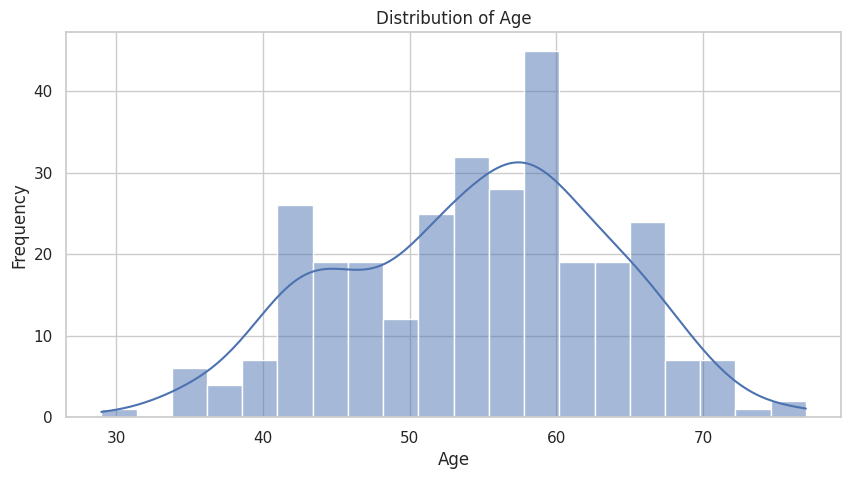

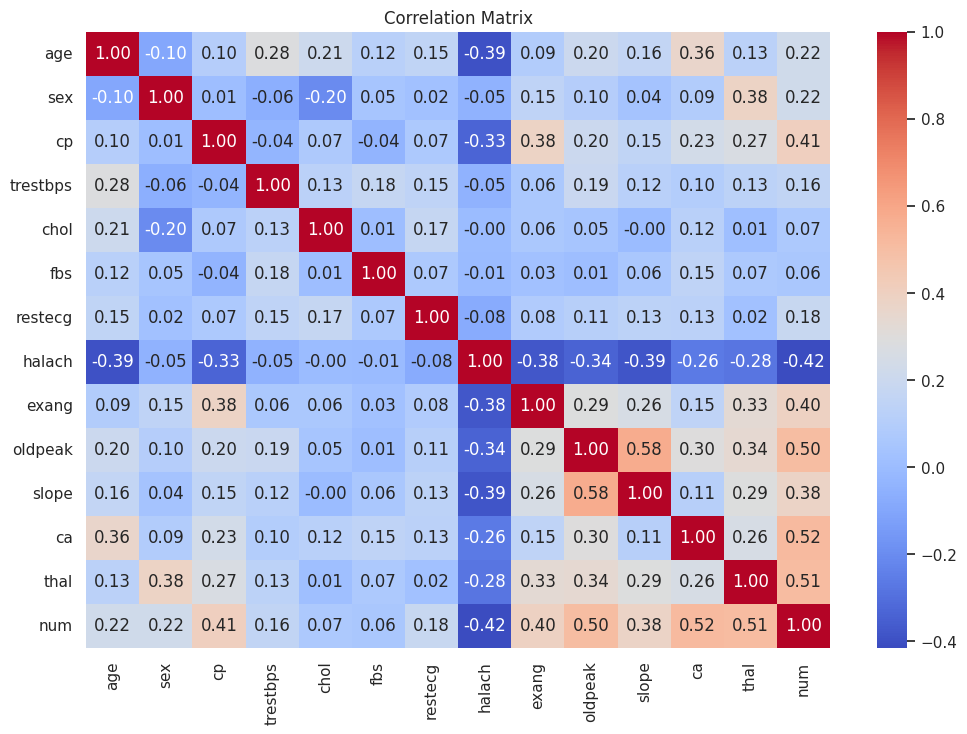

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/wcj365/python-stats-dataviz/refs/heads/master/data/cleveland_heart_disease.csv"
heart_disease_data = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(heart_disease_data.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(heart_disease_data.info())

# Display summary statistics
print("\nSummary statistics:")
print(heart_disease_data.describe(include='all'))

# Check for missing values
print("\nMissing values in the dataset:")
print(heart_disease_data.isnull().sum())

# Replace '?' with NaN and convert to numeric
heart_disease_data.replace('?', pd.NA, inplace=True)

# Convert all relevant columns to numeric
for column in heart_disease_data.columns:
    heart_disease_data[column] = pd.to_numeric(heart_disease_data[column], errors='coerce')

# Check for missing values again after conversion
print("\nMissing values after conversion:")
print(heart_disease_data.isnull().sum())

# Visualize the distribution of 'age'
plt.figure(figsize=(10, 5))
sns.histplot(heart_disease_data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = heart_disease_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
